In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from numpy import *
from scipy import signal

/Users/anlund/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data=TimeSeries.read('/Users/anlund/aDQ/data/L1-hoft-1129711814-300.hdf')

In [151]:
nyq=data.sample_rate.value/2.
bp=signal.butter(8,[50./nyq,240./nyq],btype='bandpass',output='sos')
hp=signal.butter(8,20./nyq,btype='highpass',output='sos')
hp=signal.butter(8,260./nyq,btype='lowpass',output='sos')
notchcal=signal.butter(4,[34./nyq,36./nyq],btype='bandstop',output='sos')
notch60=signal.zpk2sos([exp(1.j*pi*60./nyq),exp(-1.j*pi*60./nyq)],
               [0.9995*exp(1.j*pi*60./nyq),0.9995*exp(-1.j*pi*60./nyq)],
               1.)
notch180=signal.zpk2sos([exp(1.j*pi*180./nyq),exp(-1.j*pi*180./nyq)],
               [0.9995*exp(1.j*pi*180./nyq),0.9995*exp(-1.j*pi*180./nyq)],
               1.)
notchviolin=signal.butter(8,[480./nyq,540./nyq],btype='bandstop',output='sos')
allfilt=concatenate([bp,hp,notchcal,notch60,notch180,notchviolin])

In [152]:
fdata=data.filter(allfilt)

(1e-28, 1e-18)

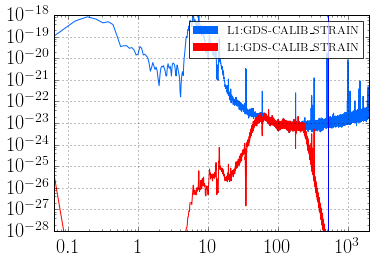

In [153]:
myplt=data[10*16384:(10+64)*16384].asd(16,12).plot()
myplt.gca().plot(fdata[10*16384:(10+64)*16384].asd(16,12))
myplt.set_xlim(0,2048)
myplt.gca().axvline(520)
myplt.set_ylim(1.e-28,1.e-18)

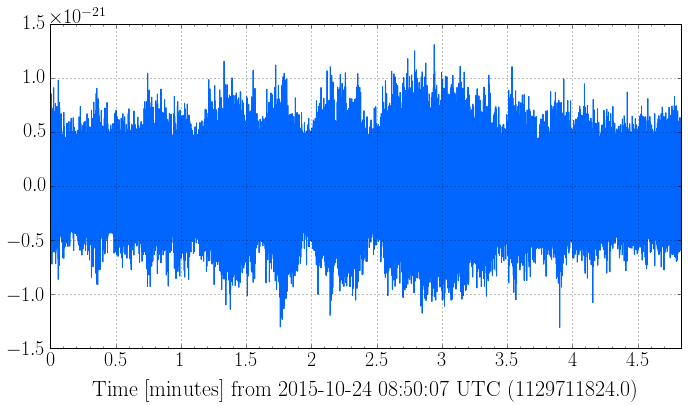

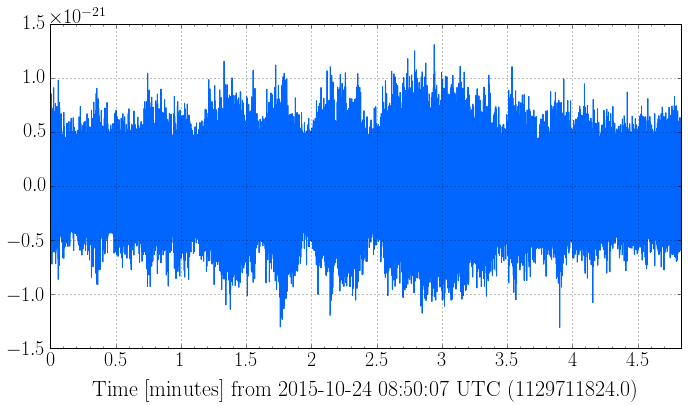

In [149]:
fdata[10*16384:].plot()

In [102]:
from scipy.io import wavfile

In [154]:
output=fdata.value[10*16384:]/max(abs(fdata.value[10*16384:]))

In [159]:
wavfile.write('test.wav',rate=2*nyq,data=output)